In [43]:
import functions_licenseplate as fl
import functions_yolo_licenseplate as yolo
import functions_recognition as r


0: 640x480 2 cars, 75.8ms
Speed: 3.0ms preprocess, 75.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x480 1 license_plate, 71.8ms
Speed: 4.0ms preprocess, 71.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


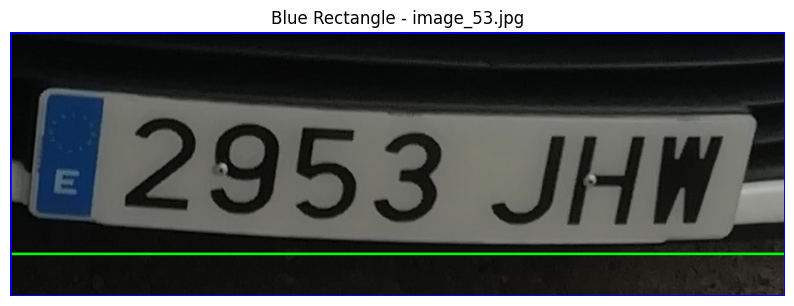

TypeError: cannot unpack non-iterable NoneType object

In [44]:
image_folder = 'G://.shortcut-targets-by-id//1xjrivG-T7lph1wnu1KGxnsESEs0U5vvV//LICENSE_PLATES_RECOGITION_L&V//combined_folder_last(onlyspain)'

#fl.plate_recognition(image_folder= image_folder)
frame_with_detections, processed_license_plate, blue_rectangle_crop = yolo.yolo_plate_recognition(image_folder=image_folder)

In [40]:
# Display the frame with detections
if frame_with_detections is not None:
    plt.imshow(cv2.cvtColor(frame_with_detections, cv2.COLOR_BGR2RGB))
    plt.title("Frame with Detections")
    plt.show()

# Display the processed license plate if available
if processed_license_plate is not None:
    plt.imshow(processed_license_plate, cmap='gray')
    plt.title("Processed License Plate")
    plt.show()

# Display the blue rectangle region if available
if blue_rectangle_crop is not None:
    plt.imshow(cv2.cvtColor(blue_rectangle_crop, cv2.COLOR_BGR2RGB))
    plt.title("Blue Rectangle Crop")
    plt.show()


NameError: name 'frame_with_detections' is not defined

In [34]:
r.OCR_image(license_plate = license_plate)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
